In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/sample_data/reduced_selected_features.csv')
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def roc_auc_score_custom(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = np.trapezoid(tpr, fpr)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    return auc_score

#Logistic Regression

In [5]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Accuracy 0.9
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.91      0.83      0.87        24

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



<Axes: >

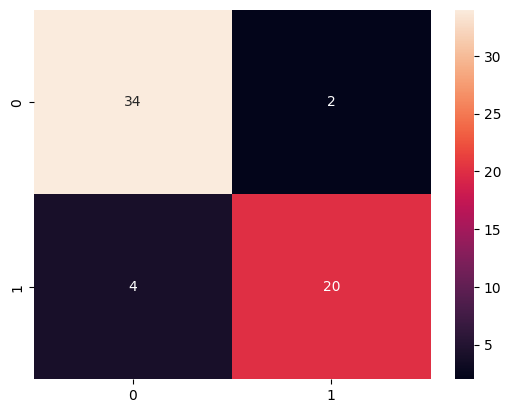

In [10]:
y_pred=logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Needed for AUC & ROC
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

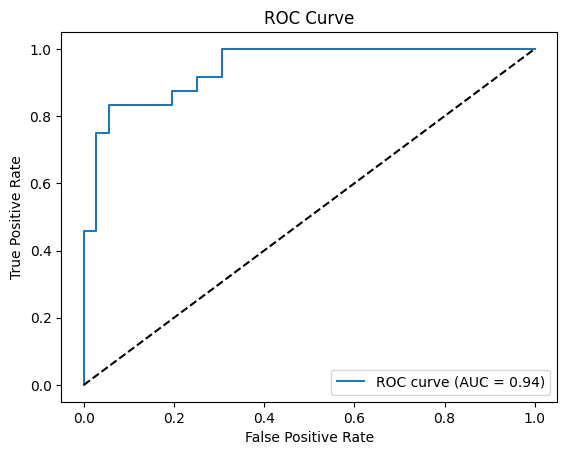

In [13]:
roc_auc_score_custom(y_test, y_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

Accuracy 0.7833333333333333
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.72      0.75      0.73        24

    accuracy                           0.78        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



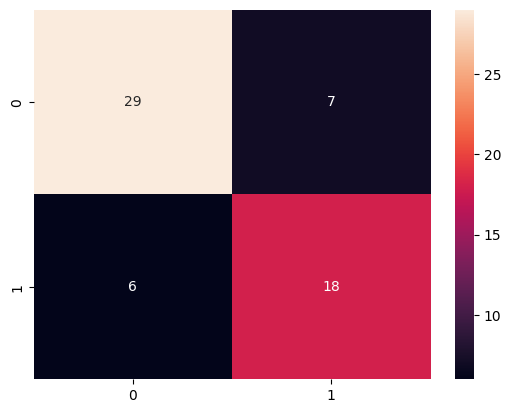

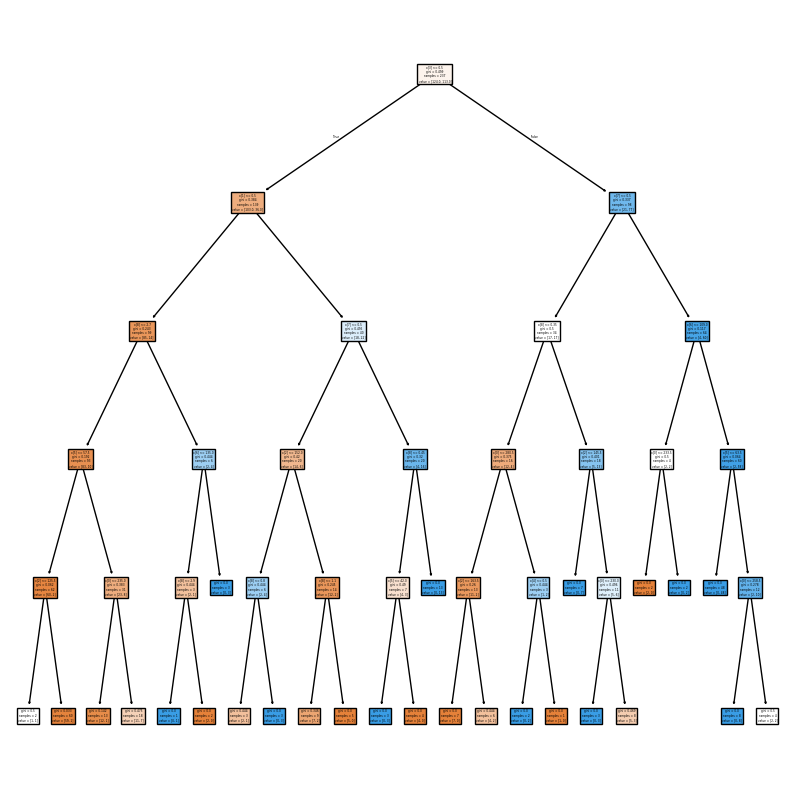

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]  # Needed for AUC & ROC
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True)
plt.show()

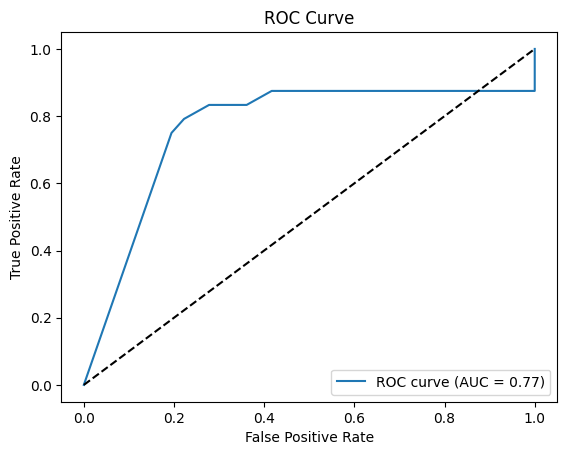

In [16]:
roc_auc_score_custom(y_test, y_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

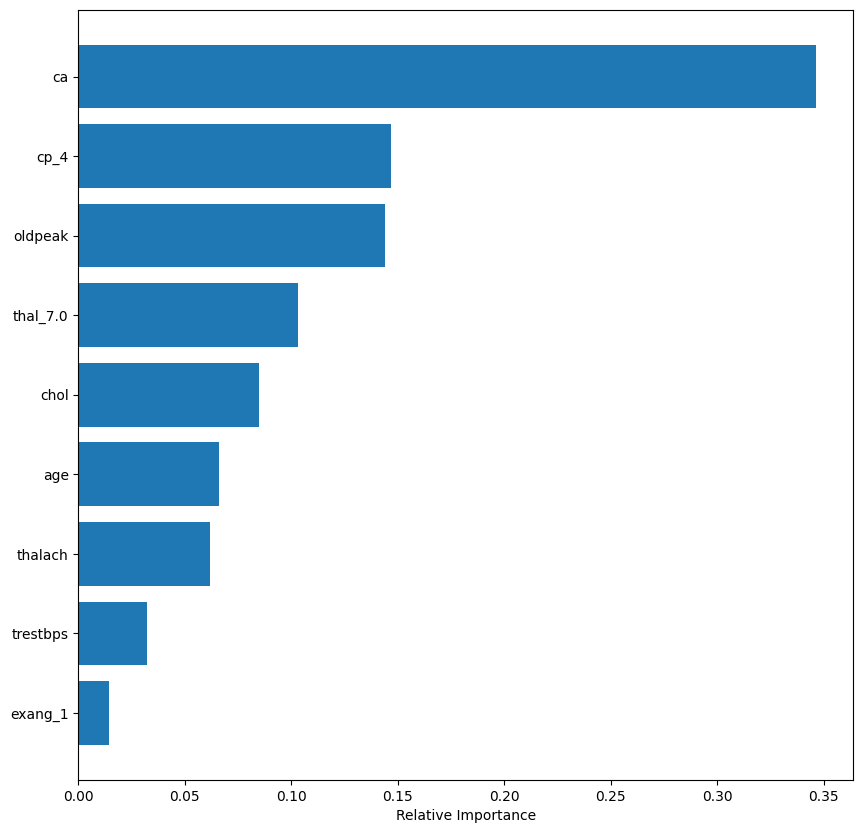

In [17]:
#plot feature importance
importances=dt.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(10,10))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest

Accuracy 0.85
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



<Axes: >

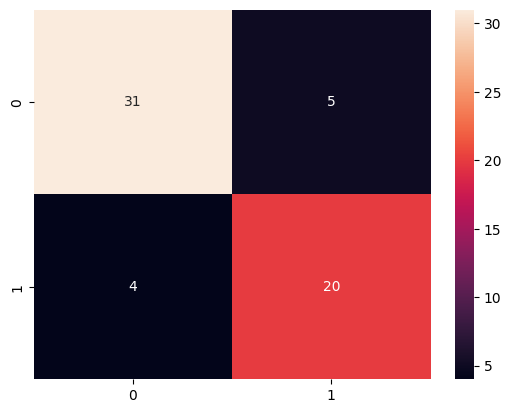

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Needed for AUC & ROC
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

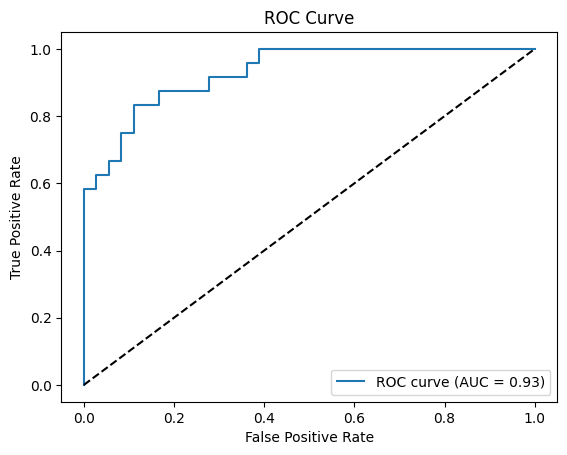

In [20]:
roc_auc_score_custom(y_test, y_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

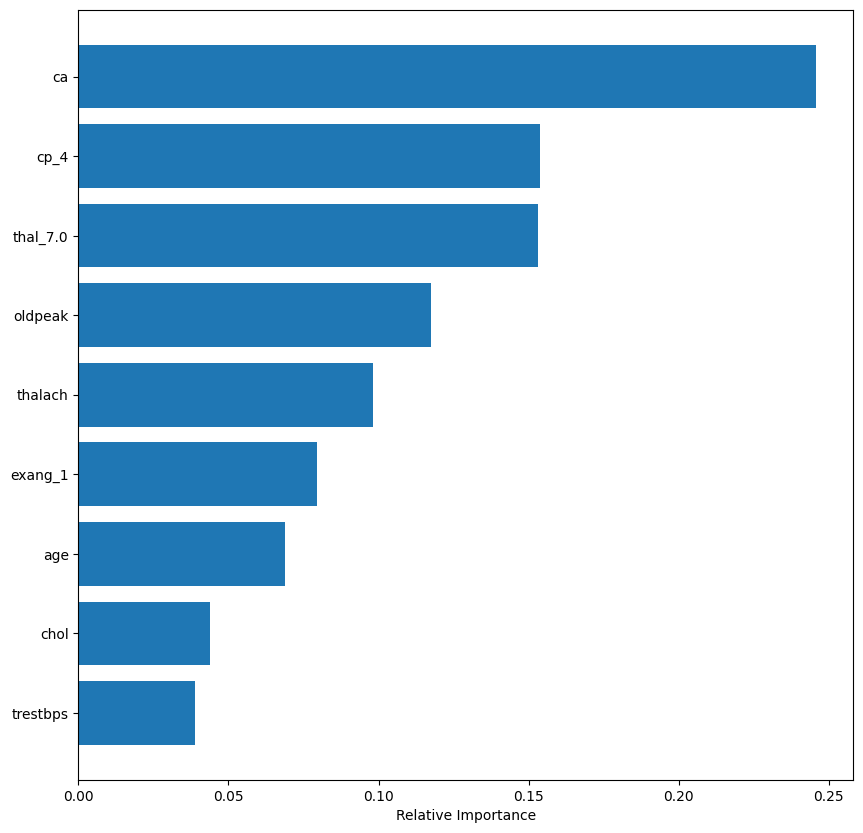

In [21]:
#plot feature importance
importances=rf.feature_importances_
indices=np.argsort(importances)
plt.figure(figsize=(10,10))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

# SVM

Accuracy 0.85
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



<Axes: >

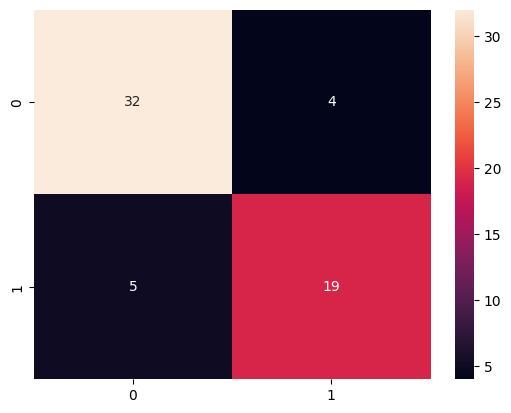

In [24]:
from sklearn.svm import SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

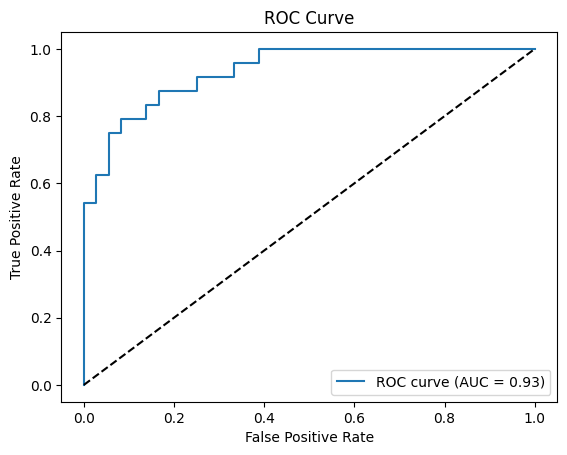

In [25]:
roc_auc_score_custom(y_test, y_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()